In [ ]:
import numpy as np
from scipy.integrate import odeint
import sympy as sm
import matplotlib.pyplot as plt

In [30]:
#Lagrange Aufstellen


t = sm.symbols('t')
m, k = sm.symbols('m k', positive = True)

q = sm.symbols('q', cls=sm.Function) # sm.function macht q zu einer funktion
q = q(t)

dq_dt = sm.diff(q, t)           #Geschiwnditgkeit
d2q_d2t = sm.diff(dq_dt, t)     #Beschleunigung

T = 1/2 * m * dq_dt**2
V = 1/2 * k * q**2

L = T-V

dL_dq = sm.diff(L, q)
dL_dqq = sm.diff(L, dq_dt)

EL = sm.diff(dL_dqq, t) - dL_dq
EL = EL.simplify()

L_lösen = sm.solve(EL, d2q_d2t)[0]

L_lösen_funktion = sm.lambdify((q, t, k, m), L_lösen) #Die lösung als funktion der verschiedenen Komponenten


<function matplotlib.pyplot.show(close=None, block=None)>

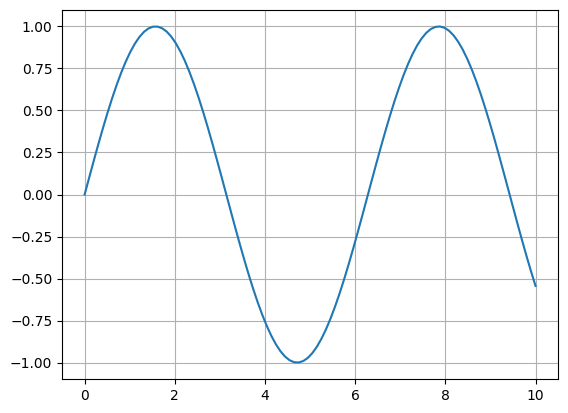

In [35]:
# Anfangswerte und k,m
Anfangs_v = input('Anfangsgeschwindigkeit:')
Anfangs_a = input('Anfangsbeschleunigung:')
Anfangswerte = [Anfangs_v,Anfangs_a]
k_wert = 1 #input('Federkonstante:')
m_wert= 1 #input('masse:')

# System der DGLs erster ordnung

def DGL_system(y, t, m, k):
    q, dq_dt = y
    d2q_d2t = L_lösen_funktion(q, t, m, k)
    return[dq_dt,d2q_d2t]

Zeitpunkte = np.linspace(0, 10, 100)                                            # zeit geht von 0-10 sek in 1/100 intervallen

Lösung = odeint(DGL_system, Anfangswerte, Zeitpunkte, args=(m_wert, k_wert))

ort = Lösung[:, 0]
geschwindigkeit = Lösung[:, 1]

plt.figure
plt.plot(Zeitpunkte, ort)
plt.grid()
plt.show